<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_98/blob/main/Reto_DS_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://static.wikia.nocookie.net/tecdemonterrey/images/1/1b/Logo_Tec_azul.png/revision/latest?cb=20190219041656&path-prefix=es" width="230" />

## **Actividad Semanal 8- Reto**


----

**Datos generales**
---
**Alumna:**

| Nombre | Matrícula del estudiante
|---|---|
| Andrés Felipe Velasco Muñoz | **A01676755** |
| Helmy Andrea Moreno Navarro | **A01793918** |


>**Materia:** Ciencia y Análistica de Datos (Gpo 10)

>**Profesora Titular:** María de la Paz Rico


16 de noviembre 2022

#**Introducción**

# **Objetivos**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import requests, zipfile
from io import BytesIO

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder

#**Limpieza, análisis, visualización y agrupamiento.**

#Importar datos

In [2]:
sub = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
req = requests.get(sub)
zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')

df=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
df


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [3]:
df_subte = df.copy()
df_subte.describe

<bound method NDFrame.describe of             CLAVE                                     SITIO  \
0          DLAGU6                              POZO SAN GIL   
1       DLAGU6516                    POZO R013 CAÑADA HONDA   
2          DLAGU7                                POZO COSIO   
3          DLAGU9                        POZO EL SALITRILLO   
4        DLBAJ107                        RANCHO EL TECOLOTE   
...           ...                                       ...   
1063  OCRBR5101M1              L-310 (COMUNIDAD SAN MANUEL)   
1064  OCRBR5102M1  L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS)   
1065  OCRBR5105M2                HACIENDA MEXIQUITO POZO 01   
1066  OCRBR5106M1                     COMUNIDAD LOS POCITOS   
1067  OCRBR5109M1                      COMUNIDAD LA REFORMA   

               ORGANISMO_DE_CUENCA               ESTADO          MUNICIPIO  \
0          LERMA SANTIAGO PACIFICO       AGUASCALIENTES           ASIENTOS   
1          LERMA SANTIAGO PACIFICO       AGUASCALIENT

In [4]:
df_subte.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [5]:
df_subte.shape

(1068, 57)

In [6]:
df_subte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [7]:
df_subte = pd.DataFrame(df_subte)
df_subte['SEMAFORO'] = df_subte['SEMAFORO'].astype('category')
df_subte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CLAVE                 1068 non-null   object  
 1   SITIO                 1068 non-null   object  
 2   ORGANISMO_DE_CUENCA   1068 non-null   object  
 3   ESTADO                1068 non-null   object  
 4   MUNICIPIO             1068 non-null   object  
 5   ACUIFERO              1068 non-null   object  
 6   SUBTIPO               1068 non-null   object  
 7   LONGITUD              1068 non-null   float64 
 8   LATITUD               1068 non-null   float64 
 9   PERIODO               1068 non-null   int64   
 10  ALC_mg/L              1064 non-null   float64 
 11  CALIDAD_ALC           1064 non-null   object  
 12  CONDUCT_mS/cm         1062 non-null   float64 
 13  CALIDAD_CONDUC        1062 non-null   object  
 14  SDT_mg/L              0 non-null      float64 
 15  SDT_

In [8]:
df_subte.isna().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

In [9]:
df_sub = df_subte.copy()

df_sub = df.drop(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'ACUIFERO','SUBTIPO', 'PERIODO', 'ALC_mg/L', 'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L', 
                  'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'CALIDAD_FLUO', 'CALIDAD_DUR', 'CALIDAD_COLI_FEC', 'CALIDAD_N_NO3', 'CALIDAD_AS', 'CALIDAD_CD', 'CR_TOT_mg/L','CALIDAD_CR', 'CALIDAD_HG',
                  'CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE', 'CONTAMINANTES', 'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
                  'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE'], axis = 1) 
df_sub

,LONGITUD,LATITUD,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
0,-102.02210,22.20887,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.0005,<0.005,<0.0015,0.0891,Verde
1,-102.20075,21.99958,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.0005,<0.005,<0.0015,<0.025,Verde
2,-102.28801,22.36685,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.0005,<0.005,<0.0015,<0.025,Rojo
3,-102.29449,22.18435,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,<0.0005,<0.005,<0.0015,<0.025,Verde
4,-110.24480,23.45138,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.0005,<0.005,<0.0015,<0.025,Rojo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-99.54191,24.76036,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.0005,<0.005,<0.0015,<0.025,Rojo
1064,-99.70099,24.78280,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.0005,<0.005,0.00709,0.07578,Rojo
1065,-99.82249,25.55197,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.0005,<0.005,0.0242,0.2129,Rojo
1066,-100.32683,24.80118,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.0005,<0.005,0.012,0.1786,Verde


In [10]:
df_sub.columns

Index(['LONGITUD', 'LATITUD', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
       'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L', 'SEMAFORO'],
      dtype='object')

In [11]:
numericas = ['LONGITUD', 'LATITUD', 'ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L',
       'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L', 'SEMAFORO']

#**Limpieza
Datos nulos

In [12]:
df_sub

,LONGITUD,LATITUD,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
0,-102.02210,22.20887,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.0005,<0.005,<0.0015,0.0891,Verde
1,-102.20075,21.99958,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.0005,<0.005,<0.0015,<0.025,Verde
2,-102.28801,22.36685,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.0005,<0.005,<0.0015,<0.025,Rojo
3,-102.29449,22.18435,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,<0.0005,<0.005,<0.0015,<0.025,Verde
4,-110.24480,23.45138,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.0005,<0.005,<0.0015,<0.025,Rojo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-99.54191,24.76036,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.0005,<0.005,<0.0015,<0.025,Rojo
1064,-99.70099,24.78280,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.0005,<0.005,0.00709,0.07578,Rojo
1065,-99.82249,25.55197,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.0005,<0.005,0.0242,0.2129,Rojo
1066,-100.32683,24.80118,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.0005,<0.005,0.012,0.1786,Verde


In [13]:
codificado = OneHotEncoder()

codifica = codificado.fit_transform(df_sub[['SEMAFORO']])

df_new = pd.DataFrame(codifica.toarray(),
                       columns = codificado.categories_)

print(df_new)

df_sub_2 = pd.concat([df_sub, df_new], axis = "columns")

     Amarillo Rojo Verde
0         0.0  0.0   1.0
1         0.0  0.0   1.0
2         0.0  1.0   0.0
3         0.0  0.0   1.0
4         0.0  1.0   0.0
...       ...  ...   ...
1063      0.0  1.0   0.0
1064      0.0  1.0   0.0
1065      0.0  1.0   0.0
1066      0.0  0.0   1.0
1067      0.0  0.0   1.0

[1068 rows x 3 columns]


In [14]:
df_sub_2

,LONGITUD,LATITUD,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO,"(Amarillo,)","(Rojo,)","(Verde,)"
0,-102.02210,22.20887,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.0005,<0.005,<0.0015,0.0891,Verde,0.0,0.0,1.0
1,-102.20075,21.99958,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.0005,<0.005,<0.0015,<0.025,Verde,0.0,0.0,1.0
2,-102.28801,22.36685,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.0005,<0.005,<0.0015,<0.025,Rojo,0.0,1.0,0.0
3,-102.29449,22.18435,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,<0.0005,<0.005,<0.0015,<0.025,Verde,0.0,0.0,1.0
4,-110.24480,23.45138,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.0005,<0.005,<0.0015,<0.025,Rojo,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-99.54191,24.76036,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.0005,<0.005,<0.0015,<0.025,Rojo,0.0,1.0,0.0
1064,-99.70099,24.78280,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.0005,<0.005,0.00709,0.07578,Rojo,0.0,1.0,0.0
1065,-99.82249,25.55197,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.0005,<0.005,0.0242,0.2129,Rojo,0.0,1.0,0.0
1066,-100.32683,24.80118,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.0005,<0.005,0.012,0.1786,Verde,0.0,0.0,1.0


In [15]:
df_sub_2.drop(['SEMAFORO'], axis = "columns", inplace=True)
df_sub_2

,LONGITUD,LATITUD,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,"(Amarillo,)","(Rojo,)","(Verde,)"
0,-102.02210,22.20887,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.0005,<0.005,<0.0015,0.0891,0.0,0.0,1.0
1,-102.20075,21.99958,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.0005,<0.005,<0.0015,<0.025,0.0,0.0,1.0
2,-102.28801,22.36685,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.0005,<0.005,<0.0015,<0.025,0.0,1.0,0.0
3,-102.29449,22.18435,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,<0.0005,<0.005,<0.0015,<0.025,0.0,0.0,1.0
4,-110.24480,23.45138,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.0005,<0.005,<0.0015,<0.025,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-99.54191,24.76036,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.0005,<0.005,<0.0015,<0.025,0.0,1.0,0.0
1064,-99.70099,24.78280,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.0005,<0.005,0.00709,0.07578,0.0,1.0,0.0
1065,-99.82249,25.55197,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.0005,<0.005,0.0242,0.2129,0.0,1.0,0.0
1066,-100.32683,24.80118,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.0005,<0.005,0.012,0.1786,0.0,0.0,1.0


In [19]:
for i in numericas:
  print(" nombre de la columna -------------------------" + i)

 nombre de la columna -------------------------LONGITUD
 nombre de la columna -------------------------LATITUD
 nombre de la columna -------------------------ALC_mg/L
 nombre de la columna -------------------------CONDUCT_mS/cm
 nombre de la columna -------------------------SDT_M_mg/L
 nombre de la columna -------------------------FLUORUROS_mg/L
 nombre de la columna -------------------------DUR_mg/L
 nombre de la columna -------------------------COLI_FEC_NMP/100_mL
 nombre de la columna -------------------------N_NO3_mg/L
 nombre de la columna -------------------------AS_TOT_mg/L
 nombre de la columna -------------------------CD_TOT_mg/L
 nombre de la columna -------------------------CR_TOT_mg/L
 nombre de la columna -------------------------HG_TOT_mg/L
 nombre de la columna -------------------------PB_TOT_mg/L
 nombre de la columna -------------------------MN_TOT_mg/L
 nombre de la columna -------------------------FE_TOT_mg/L
 nombre de la columna -------------------------SEMAFORO


In [31]:
def know_min_max(columns,dType):
  for column in columns:
    print(f'{dType} - {column}: max {df[column].max()}, min: {df[column].min()}')
  
  plt.hist(df[columns])
  plt.show()

In [23]:
print(" sumatoria por valores uncos--------------------") 
print(df_sub[i].value_counts())

 sumatoria por valores uncos--------------------
Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64


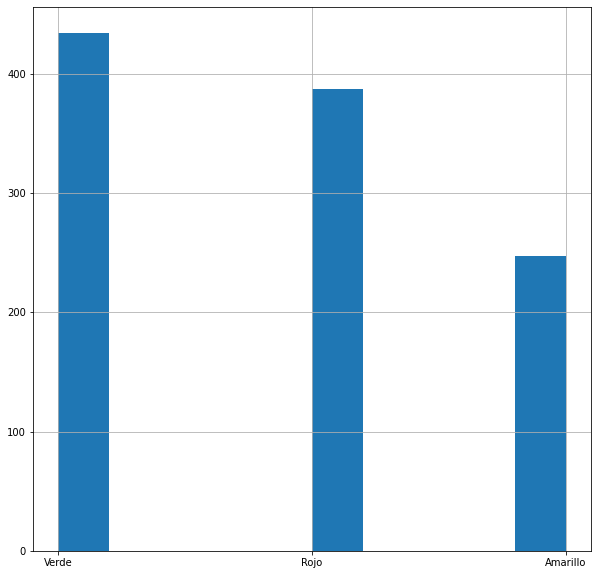

In [24]:
y = df_sub['SEMAFORO']
y
y.hist(bins = 10, figsize=(10, 10))

In [32]:
for name in numericas:
  
  df_sub[name] = df_sub[name].astype('int')
  df_sub[name] = df_sub[name].astype('int')
  df_sub[name] = df_sub[name].astype('int') 
  df_sub[name] = df_sub[name].str.replace('<0.2','0.2')
  df_sub[name] = df_sub[name].astype('int')
  df_sub[name] = df_sub[name].str.replace('<1.1','1.1')
  df_sub[name] = df_sub[name].str.replace('<0.02','0.02') 
  df_sub[name] = df_sub[name].str.replace('<0.01','0.01') 
  df_sub[name] = df_sub[name].str.replace('<0.003','0.003')
  df_sub[name] = df_sub[name].str.replace('<0.005','0.004') 
  df_sub[name] = df_sub[name].str.replace('<0.0005','0.0004') 
  df_sub[name] = df_sub[name].str.replace('<0.0015','0.0015') 
  df_sub[name] = df_sub[name].str.replace('<0.025','0.025')
  df_sub[name] = df_sub[name].astype('int')
  df_sub[name] = df_sub[name].astype('int')
  df_sub[name] = df_sub[name].astype('int') 


df_sub.info()

KeyError: ignored

#Análisis
Describe(), mean()

Identificando tendencias centrales promedio, media y mediana de los datos. 
Identificar medidas de dispersión, máximo, mínimo.

In [25]:
df_sub_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LONGITUD             1068 non-null   float64
 1   LATITUD              1068 non-null   float64
 2   SDT_M_mg/L           1066 non-null   object 
 3   FLUORUROS_mg/L       1068 non-null   object 
 4   DUR_mg/L             1067 non-null   object 
 5   COLI_FEC_NMP/100_mL  1068 non-null   object 
 6   N_NO3_mg/L           1067 non-null   object 
 7   AS_TOT_mg/L          1068 non-null   object 
 8   CD_TOT_mg/L          1068 non-null   object 
 9   HG_TOT_mg/L          1068 non-null   object 
 10  PB_TOT_mg/L          1068 non-null   object 
 11  MN_TOT_mg/L          1068 non-null   object 
 12  FE_TOT_mg/L          1068 non-null   object 
 13  (Amarillo,)          1068 non-null   float64
 14  (Rojo,)              1068 non-null   float64
 15  (Verde,)             1068 non-null   f

In [30]:
df_sub_2.describe()

,LONGITUD,LATITUD,"(Amarillo,)","(Rojo,)","(Verde,)"
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,-101.891007,23.163618,0.231273,0.362360,0.406367
std,6.703263,3.887670,0.421844,0.480907,0.491385
min,-116.664250,14.561150,0.000000,0.000000,0.000000
25%,-105.388865,20.212055,0.000000,0.000000,0.000000
50%,-102.174180,22.617190,0.000000,0.000000,0.000000
75%,-98.974716,25.510285,0.000000,1.000000,1.000000
max,-86.864120,32.677713,1.000000,1.000000,1.000000


#Visualización

- lot, boxplot de pandas
  - Identificar medidas de dispersión, máximo, mínimo.
  - Identificar medidas de posición no centrales , los cuartiles , outliers.  

#**Identificar correlaciones.**

r2

#Agrupamiento

# Parte 2

2. Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de **K- means.**

# Resultados

Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.